<a href="https://colab.research.google.com/github/KevinEnriquez96/Proyecto-de-titulacion/blob/main/TestFiltrosEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias**

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler


## **Señales EEG sin filtrar**

In [125]:
df=pd.read_csv('datos.csv')

df.head(100)

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
0,53,59679,33171,5903,22574,5768,15979,6092,8450
1,54,27242,59829,36221,6567,27047,28193,11273,7100
2,61,52717,26400,32342,3796,14861,10422,5335,7559
3,78,21978,19052,5960,4705,34741,19105,11767,8274
4,78,4625,19903,8212,14641,15605,9930,5125,3771
...,...,...,...,...,...,...,...,...,...
95,54,58262,1029,41777,33526,8904,15330,8705,5209
96,54,26904,13914,18726,11730,21450,10656,6822,7323
97,67,6828,11667,21692,21856,19065,9736,4837,2921
98,61,8654,16205,25152,22389,11949,3895,4830,5376


In [127]:
x1 = df.values
xv = x1.reshape(300,9)
df1 = pd.DataFrame(xv)


## **Gráfica de señales**

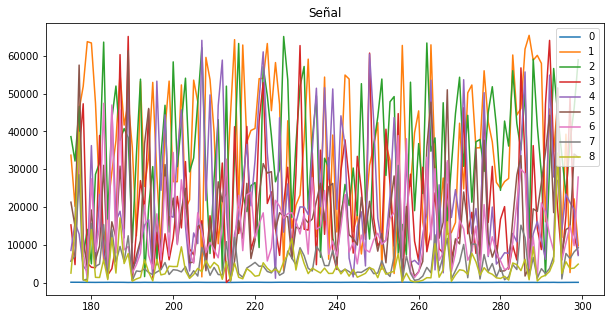

In [128]:
df1[175:350].plot(figsize=(10,5))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

## **Análisis de datos**

In [129]:
signal1=df['atencion']
signal2=df['delta']
signal3=df['theta ']
signal4=df['low alp']
signal5=df['high alp ']
signal6=df['low bet']
signal7=df['high bet']
signal8=df['low gamm']
signal9=df['min gamm ']


df1=df.drop(['delta','theta ','low alp','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df2=df.drop(['atencion','theta ','low alp','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df3=df.drop(['atencion','delta','low alp','high alp ','low bet','high bet','low gamm','min gamm ' ],axis=1)
df4=df.drop(['atencion','delta','theta ','high alp ','low bet','high bet','low gamm','min gamm '],axis=1)
df5=df.drop(['atencion','delta','theta ','low alp','low bet','high bet','low gamm','min gamm ' ],axis=1)
df6=df.drop(['atencion','delta','theta ','low alp','high alp ','high bet','low gamm','min gamm ' ],axis=1)
df7=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','low gamm','min gamm '],axis=1)
df8=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','high bet','min gamm '],axis=1)
df9=df.drop(['atencion','delta','theta ','low alp','high alp ','low bet','high bet','low gamm'],axis=1)

In [231]:
df[:500].describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,50.776667,33518.226667,31070.333333,19403.800000,19594.323333,16082.226667,12600.223333,4942.443333,3806.503333
std,20.162387,17816.956119,17079.222375,15043.769958,15491.064555,11420.811810,8945.520598,4676.266228,4268.727143
min,1.000000,57.000000,1002.000000,41.000000,508.000000,127.000000,139.000000,98.000000,26.000000
25%,37.000000,18560.000000,17273.750000,7660.500000,7741.000000,6812.500000,6513.750000,2127.250000,1404.500000
50%,53.000000,34658.000000,30704.500000,14373.000000,15040.500000,14224.500000,10650.500000,3752.500000,2917.000000
75%,66.000000,47389.500000,43586.000000,28075.250000,25791.750000,21625.500000,16309.000000,6531.250000,4730.500000
max,93.000000,65529.000000,65086.000000,65098.000000,64406.000000,61305.000000,47410.000000,48927.000000,39739.000000


## **Graficas de señales sin filtrar**

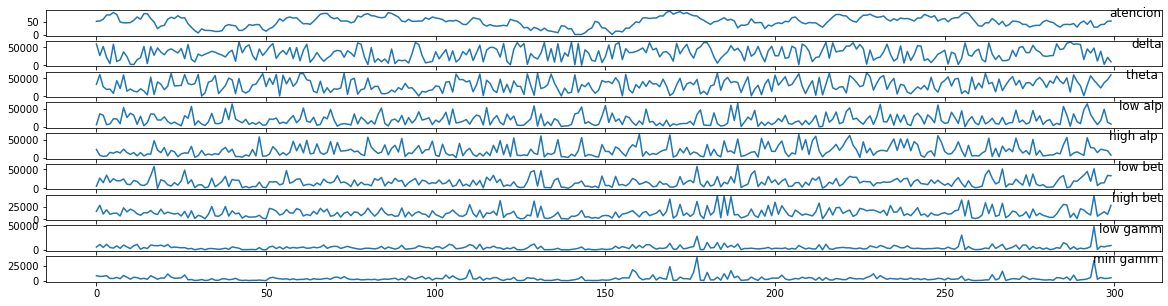

In [131]:
groups = [0,1,2,3,4,5,6,7,8]
i = 1
# plot each column
plt.figure(figsize=(20,5))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

## **Filtro - Media movil**

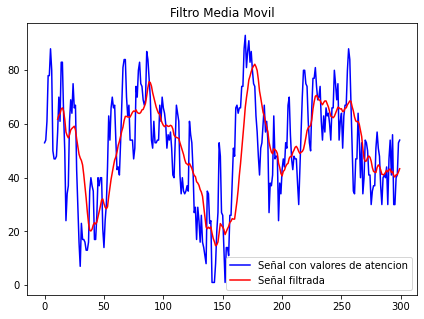

In [132]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
moving_avg5 = pd.Series(signal5).rolling(window=12).mean()
moving_avg6 = pd.Series(signal6).rolling(window=12).mean()
moving_avg7 = pd.Series(signal4).rolling(window=12).mean()
moving_avg8 = pd.Series(signal5).rolling(window=12).mean()
moving_avg9 = pd.Series(signal6).rolling(window=12).mean()

signal1[:500].plot(figsize=(7,5),label='Señal con valores de atencion',color='blue')
moving_avg1[:500].plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')



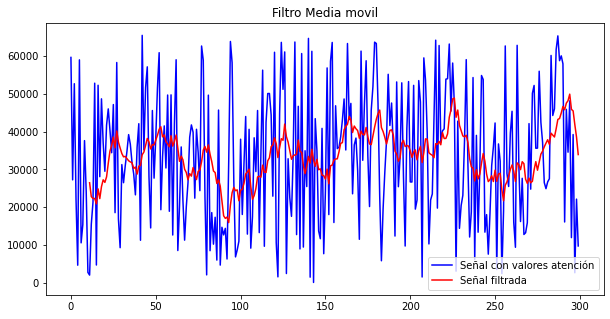

In [134]:
signal2[:500].plot(figsize=(10,5),label='Señal con valores atención',color='blue')
moving_avg2[:500].plot(label='Señal filtrada',color='red')
plt.title('Filtro Media movil')
plt.legend(loc='best')

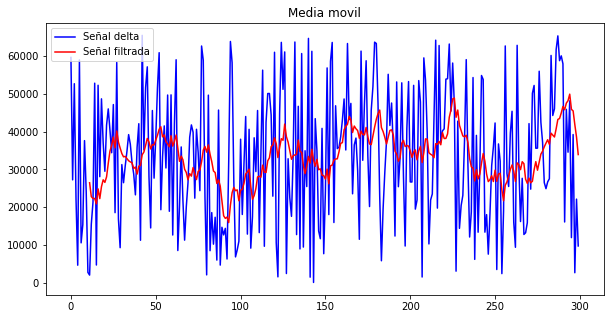

In [135]:
signal2[:500].plot(figsize=(10,5),label='Señal delta',color='blue')
moving_avg2[:500].plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

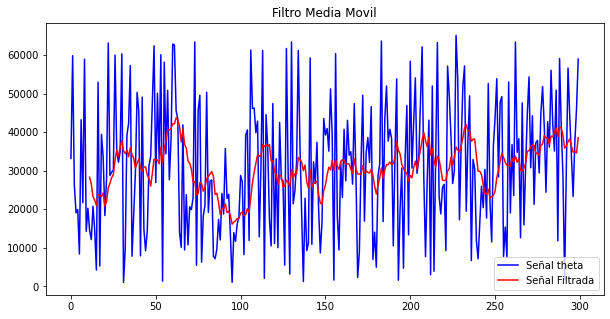

In [136]:
signal3[:500].plot(figsize=(10,5),label='Señal theta',color='blue')
moving_avg3[:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')


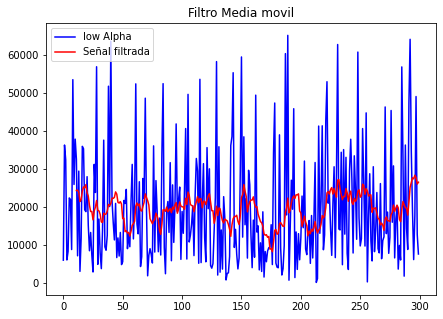

In [137]:
signal4[:500].plot(figsize=(7,5),label='low Alpha',color='blue')
moving_avg4.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media movil')
plt.legend(loc='best')

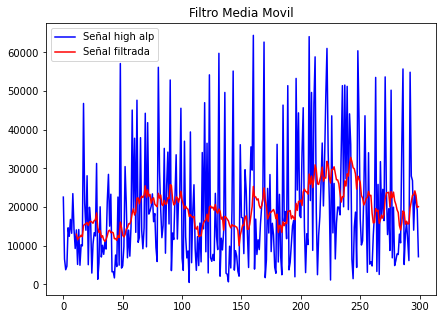

In [138]:

signal5[:500].plot(figsize=(7,5),label='Señal high alp',color='blue')
moving_avg5.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

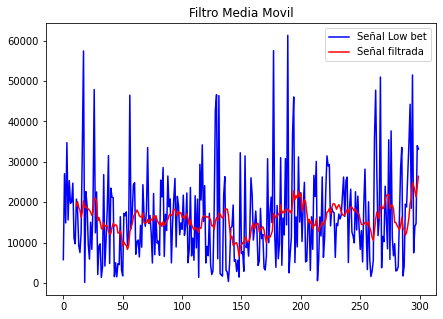

In [139]:
signal6[:500].plot(figsize=(7,5),label='Señal Low bet',color='blue')
moving_avg6.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

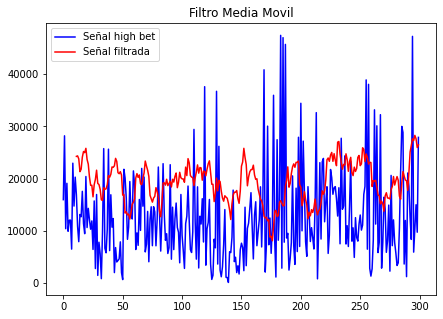

In [140]:
signal7[:500].plot(figsize=(7,5),label='Señal high bet',color='blue')
moving_avg7.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

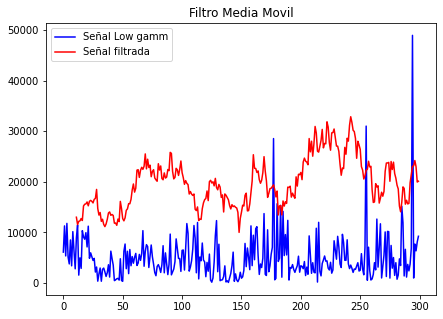

In [141]:
signal8[:500].plot(figsize=(7,5),label='Señal Low gamm',color='blue')
moving_avg8.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')

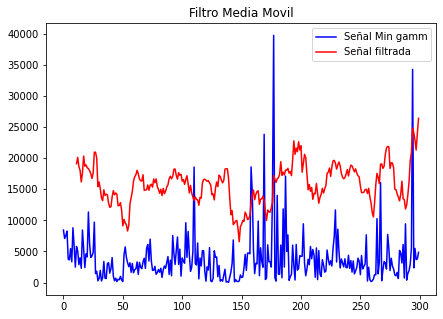

In [142]:
signal9[:500].plot(figsize=(7,5),label='Señal Min gamm',color='blue')
moving_avg9.plot(label='Señal filtrada',color='red')
plt.title('Filtro Media Movil')
plt.legend(loc='best')


## **Impresion de resultados con las señales filtradas con el filtro media movil**

In [143]:
df5=pd.DataFrame()
df5['atencion']=moving_avg1
df5['delta']=moving_avg2
df5['theta']=moving_avg3
df5['low alp']=moving_avg4
df5['high alp ']=moving_avg5
df5['low bet']=moving_avg6
df5['high bet']=moving_avg7
df5['low gamm']=moving_avg8
df5['min gamm']=moving_avg9
df5[30:50].head()
#Genera una matrix nueva con los datos de la media, desviacion estandar
df5.to_csv('MediaMovil1.csv')
df5.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,50.637255,33679.975490,30893.903691,19305.231546,19724.966551,15815.922145,19305.231546,19724.966551,15815.922145
std,15.959637,6234.725495,5717.668616,3812.066214,4907.974322,3180.827007,3812.066214,4907.974322,3180.827007
min,14.666667,15922.083333,16116.250000,8118.833333,9989.750000,6575.166667,8118.833333,9989.750000,6575.166667
25%,41.916667,29317.250000,27389.083333,16376.083333,15786.333333,13911.333333,16376.083333,15786.333333,13911.333333
50%,51.583333,33891.583333,31114.500000,19642.000000,19470.166667,15920.500000,19642.000000,19470.166667,15920.500000
75%,63.916667,38104.583333,34838.166667,22200.250000,22710.833333,17744.250000,22200.250000,22710.833333,17744.250000
max,82.250000,49948.500000,43704.083333,28276.833333,32846.833333,26400.500000,28276.833333,32846.833333,26400.500000


## **Filtro - Savitzky golay**

In [192]:

from scipy.signal import savgol_filter
np.set_printoptions(precision=2) 

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['delta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['theta ']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['low alp']=SG4
SG5=savgol_filter(signal5, 21, 3)
df5['high alp ']=SG5
SG6=savgol_filter(signal6, 21, 3)
df6['low bet']=SG6
SG7=savgol_filter(signal7, 21, 3)
df7['high bet']=SG7
SG8=savgol_filter(signal8, 21, 3)
df8['low gamm']=SG8
SG9=savgol_filter(signal9, 21, 3)
df9['min gamm']=SG9






## **Graficas del filtro Savitzky-Golay**

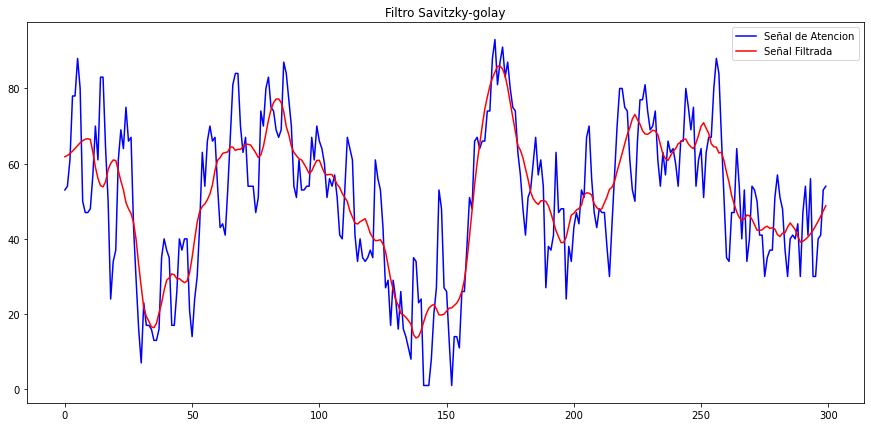

In [204]:

signal1[:500].plot(figsize=(15,7),label='Señal de Atencion',color='blue')
df1['atencion'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

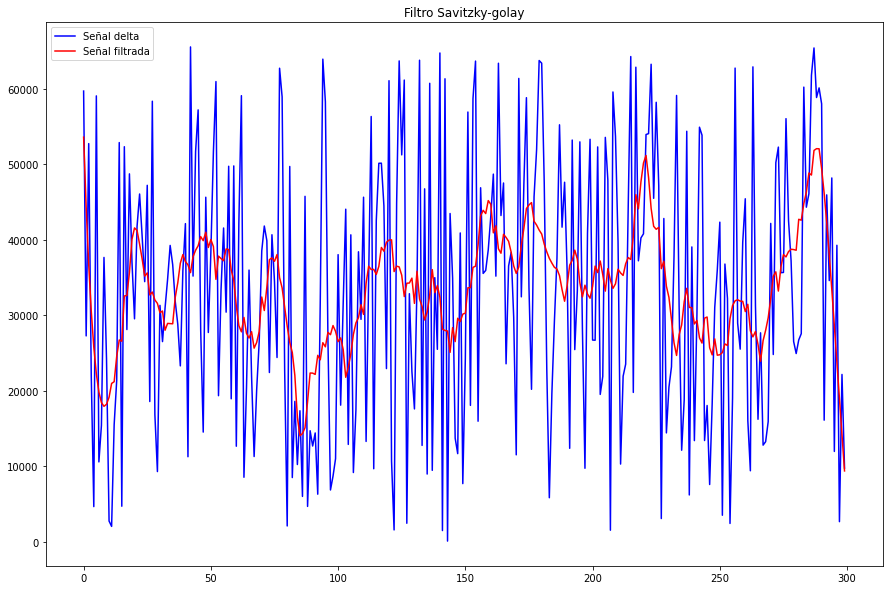

In [203]:
signal2.plot(figsize=(15,10),label='Señal delta',color='blue')
df2['delta'].plot(label='Señal filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')


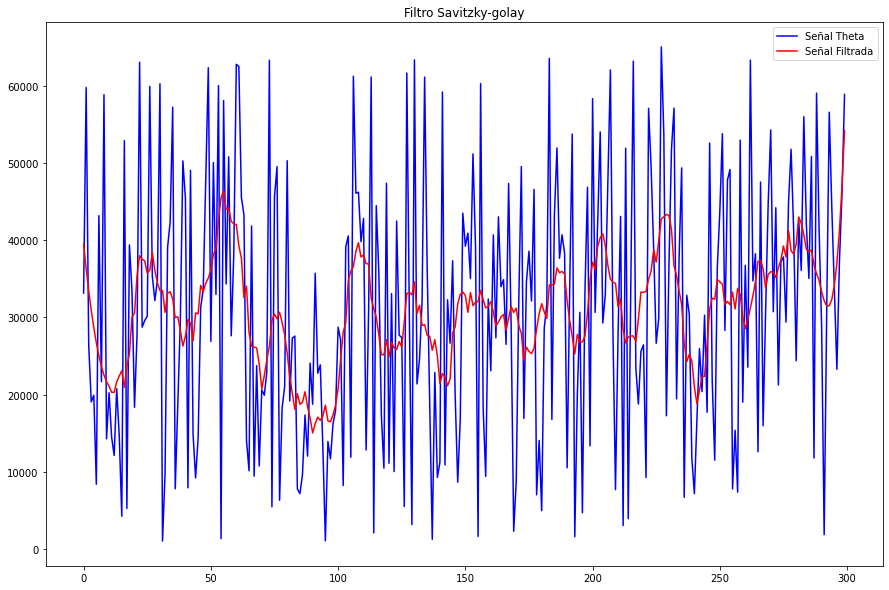

In [205]:

signal3[:500].plot(figsize=(15,10),label='Señal Theta',color='blue')
df3['theta '][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

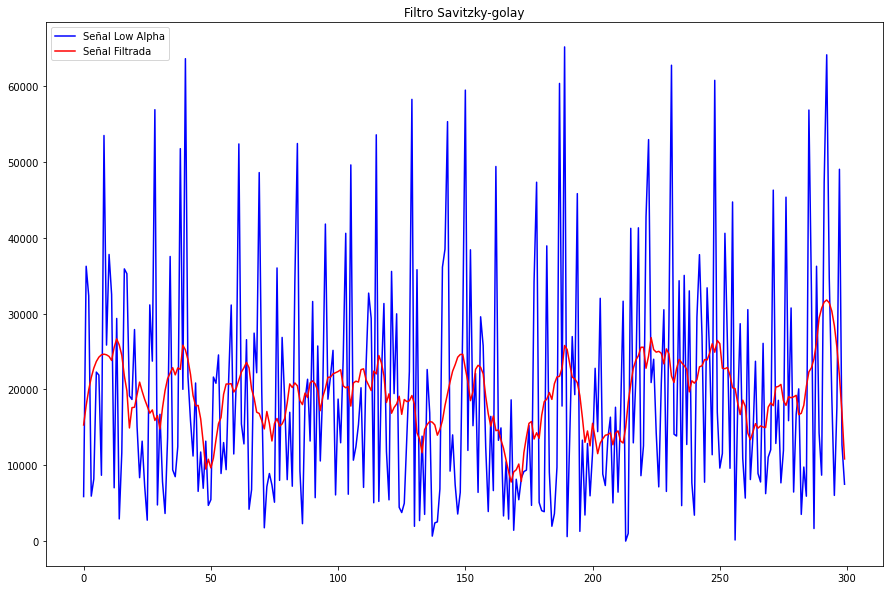

In [206]:

signal4[:500].plot(figsize=(15,10),label='Señal Low Alpha',color='blue')
df4['low alp'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

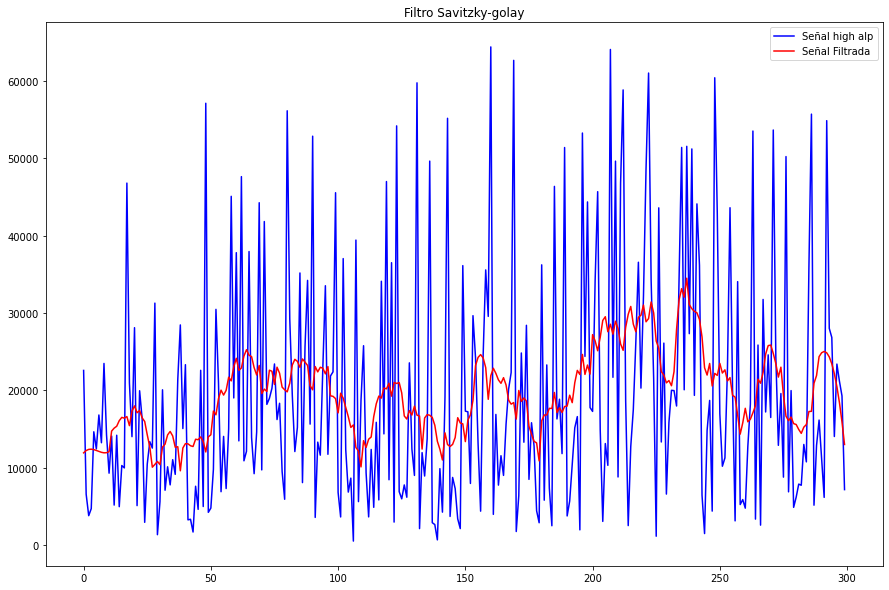

In [219]:

signal5[:500].plot(figsize=(15,10),label='Señal high alp',color='blue')
df5['high alp'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

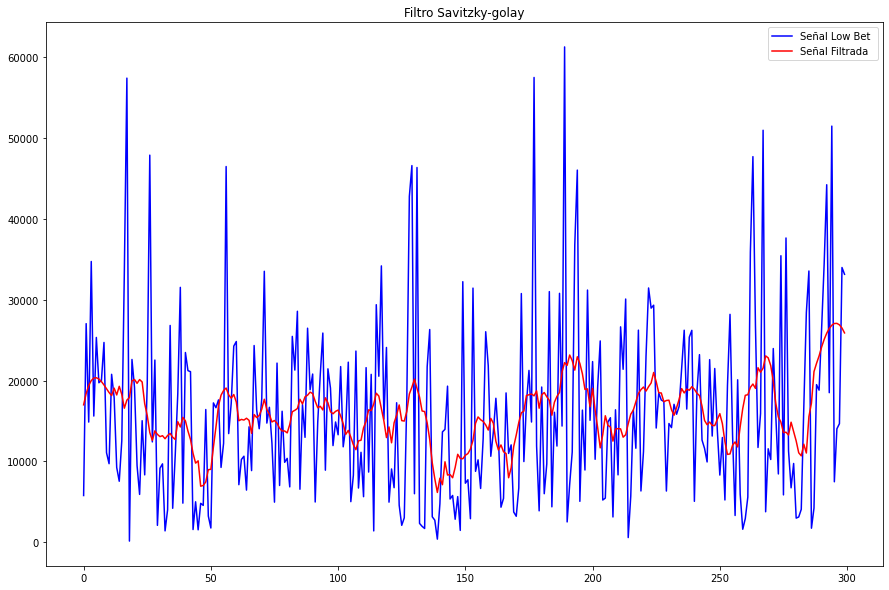

In [218]:
signal6[:500].plot(figsize=(15,10),label='Señal Low Bet ',color='blue')
df6['low bet'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

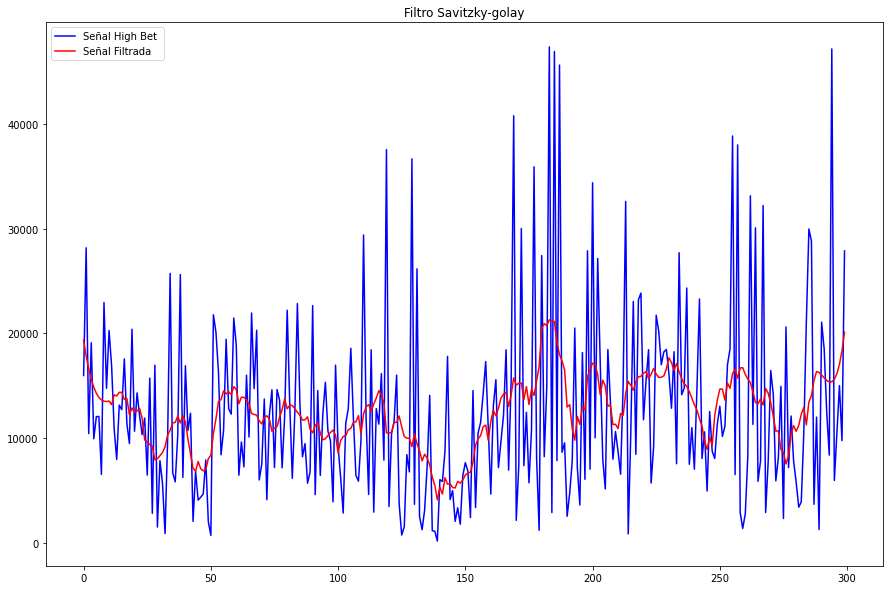

In [217]:
signal7[:500].plot(figsize=(15,10),label='Señal High Bet ',color='blue')
df7['high bet'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

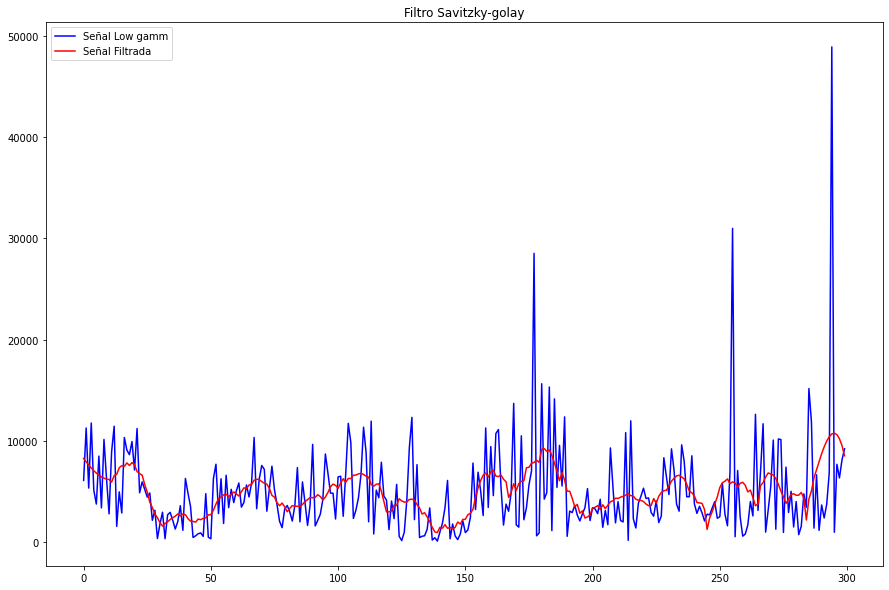

In [216]:
signal8[:500].plot(figsize=(15,10),label='Señal Low gamm',color='blue')
df8['low gamm'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

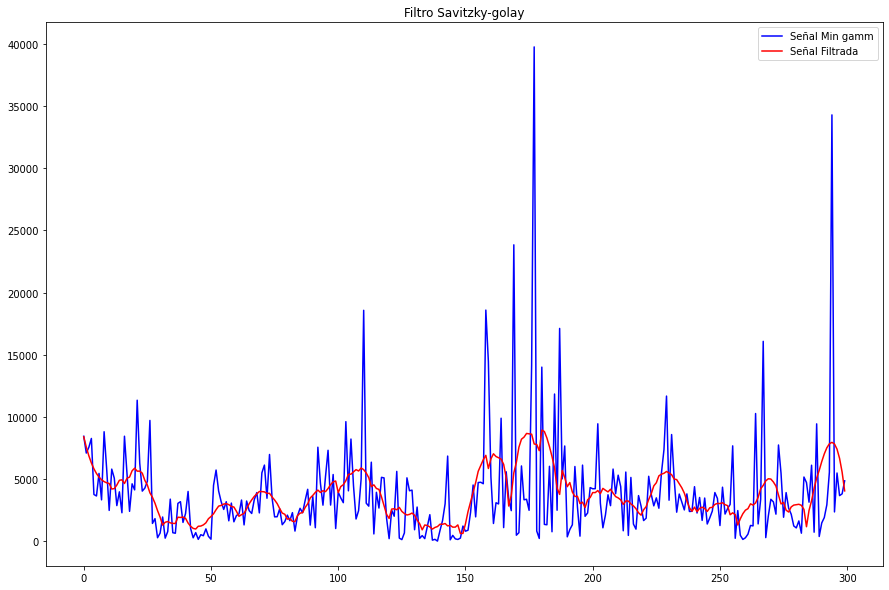

In [215]:
signal9[:500].plot(figsize=(15,10),label='Señal Min gamm',color='blue')
df9['min gamm'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Filtro Savitzky-golay')
plt.legend(loc='best')

## **Impresion de resultados con las señales filtradas con el filtro Savitzky Golay**

In [220]:

df5=pd.DataFrame()
df5['atencion']=SG1
df5['delta']=SG2
df5['theta']=SG3
df5['low alp']=SG4
df5['high alp']=SG5
df5['low bet']=SG6
df5['high bet']=SG7
df5['low gamm']=SG8
df5['min gamm']=SG9
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('Sujeto10Filtrado.csv')
df5.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,50.770503,33485.297038,31047.070079,19422.451054,19600.733144,16090.379890,12587.639607,4947.146132,3810.523518
std,16.613495,7365.330290,6618.108655,4438.915223,5236.214518,3887.467850,3264.756174,1973.617272,1871.091519
min,13.625041,9353.340391,15021.143511,7811.190585,9596.578947,6148.948022,4087.885910,944.289964,639.695652
25%,41.442997,28473.346437,26779.354561,16164.211180,15761.176447,13595.971805,10500.959627,3603.241337,2416.102321
50%,51.824779,33863.330500,31413.537757,19731.525172,19321.563746,16151.476299,12801.394900,4750.110330,3542.782118
75%,63.814645,38015.736107,35638.699493,22723.419255,22982.958810,18441.908140,14777.549930,6246.012668,4958.469293
max,85.951291,53572.533409,54227.225767,31780.459925,34500.542988,27079.961432,21308.542334,10762.203968,8943.787185


## **Filtro** FIR

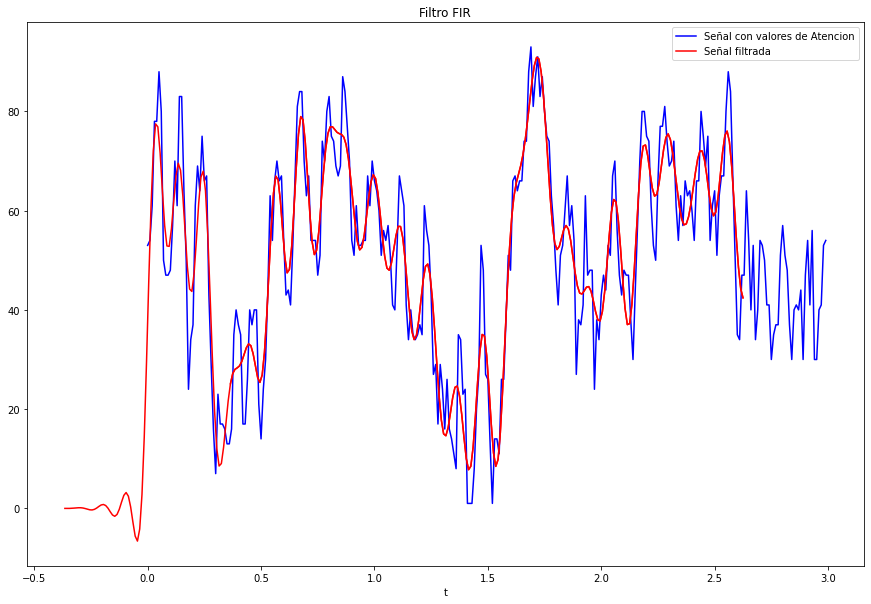

In [233]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Crear un filtro FIR y aplicarlo a x.
#------------------------------------------------
# La tasa de Nyquist de la señal.
nyq_rate = sample_rate / 2.0

# La anchura deseada de la transición de paso a parada,
# relativa a la tasa de Nyquist.  Diseñaremos el filtro
# con un ancho de transición de 5 Hz.
width = 5.0/nyq_rate
# La atenuación deseada en la banda de parada, en dB.
ripple_db = 60.0
# Calcula el orden y el parámetro Kaiser para el filtro FIR
N, beta = kaiserord(ripple_db, width)
# La frecuencia de corte del filtro.
cutoff_hz = 10.0
# Utiliza firwin con una ventana Kaiser para crear un filtro FIR de paso bajo.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Usa lfilter para filtrar x con el filtro FIR.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Traza las señales original y filtrada.
#------------------------------------------------
filtered_x =filtered_x 
# El retardo de fase de la señal filtrada.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
# Traza la señal original.
plot(t, signal1[:300],color='blue')
# Traza la señal filtrada, desplazada para compensar el retardo de fase.
plot(t-delay, filtered_x[:300],color='red')
# Traza sólo la parte "buena" de la señal filtrada.  Las primeras N-1
# están "corrompidas" por las condiciones iniciales.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal con valores de Atencion', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()


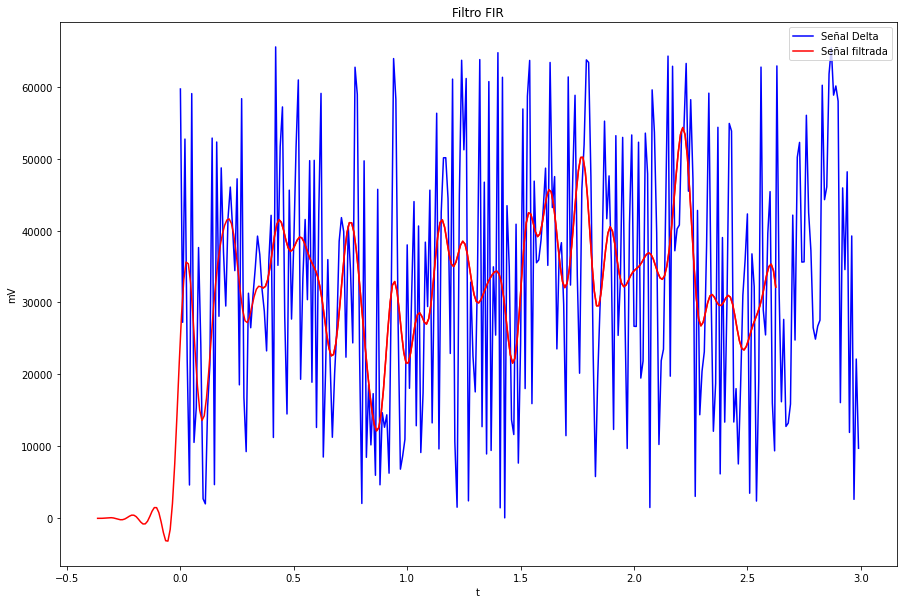

In [234]:

filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal2[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Delta', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

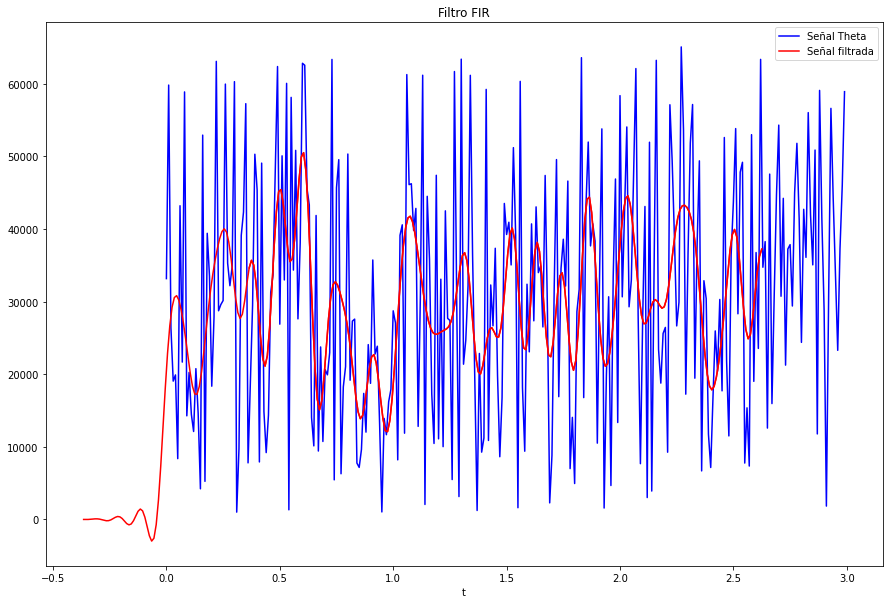

In [235]:

filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal3[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
xlabel('t')
title('Filtro FIR')
legend(('Señal Theta', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

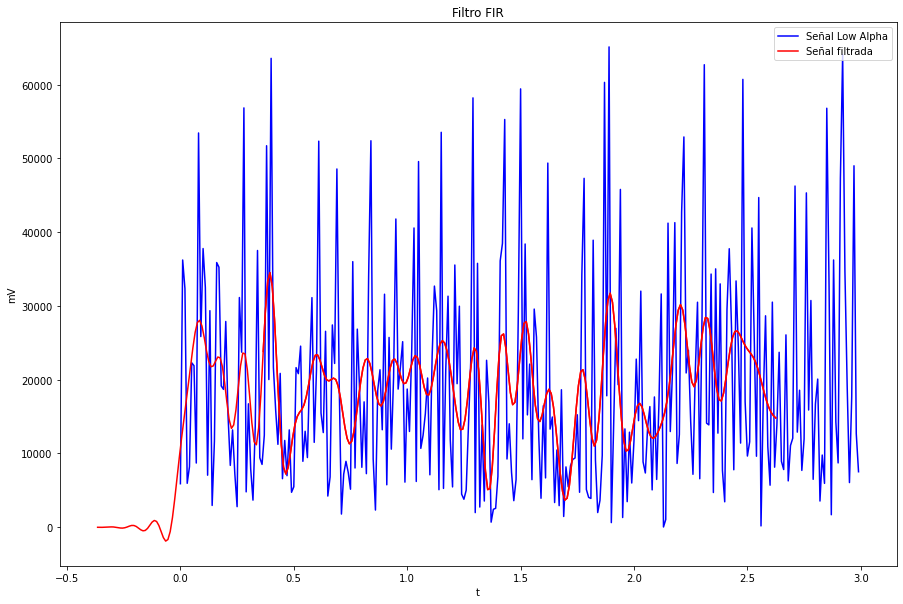

In [238]:

filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal4[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low Alpha', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

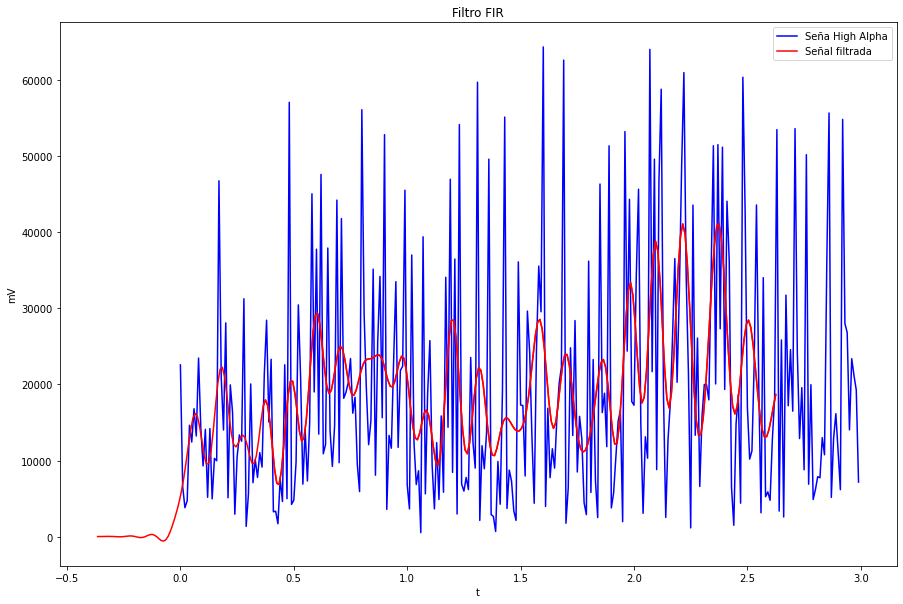

In [237]:

filtered_x = lfilter(taps, 1.0, signal5)
df5['FIR5']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal5[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Seña High Alpha', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

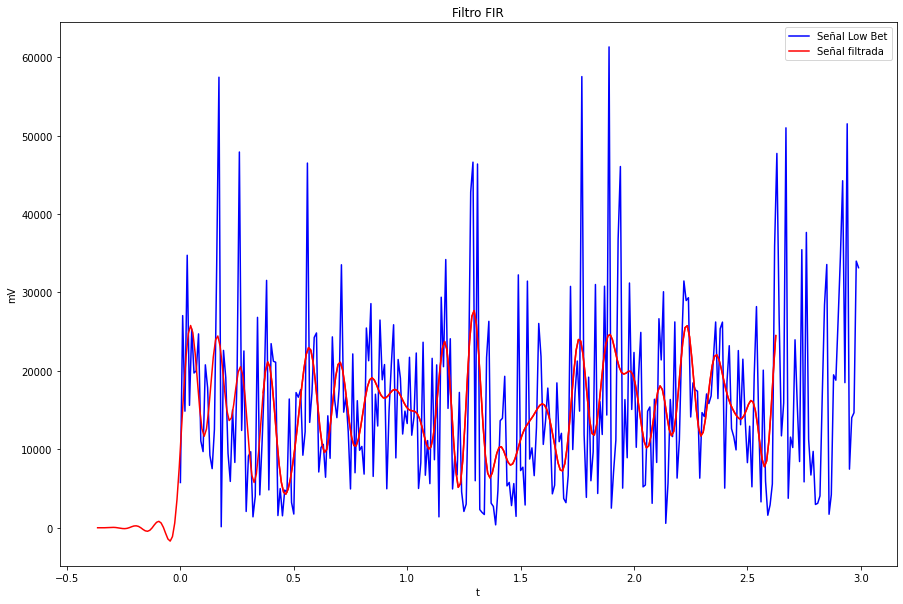

In [246]:

filtered_x = lfilter(taps, 1.0, signal6)
df6['FIR6']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal6[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low Bet', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

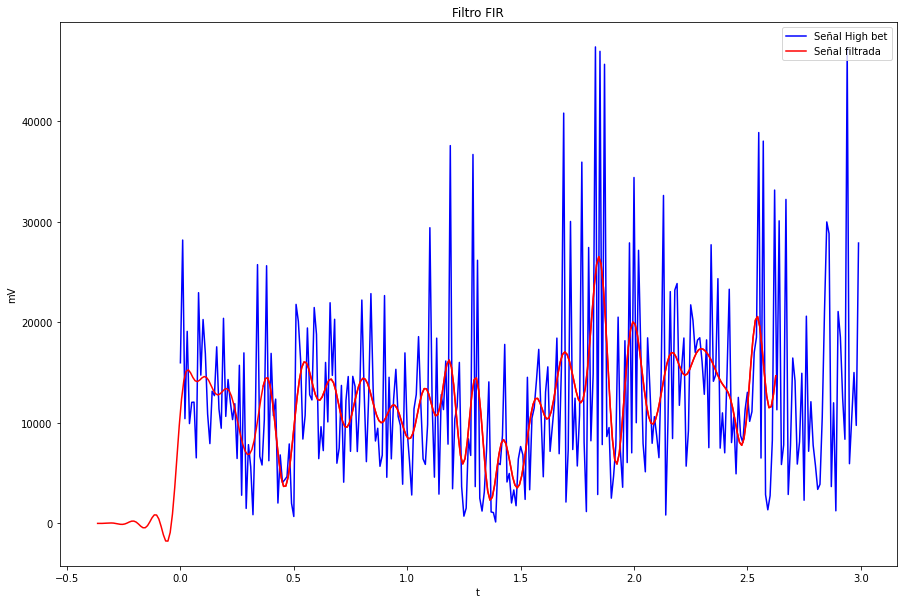

In [250]:
filtered_x = lfilter(taps, 1.0, signal7)
df7['FIR7']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal7[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal High bet', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

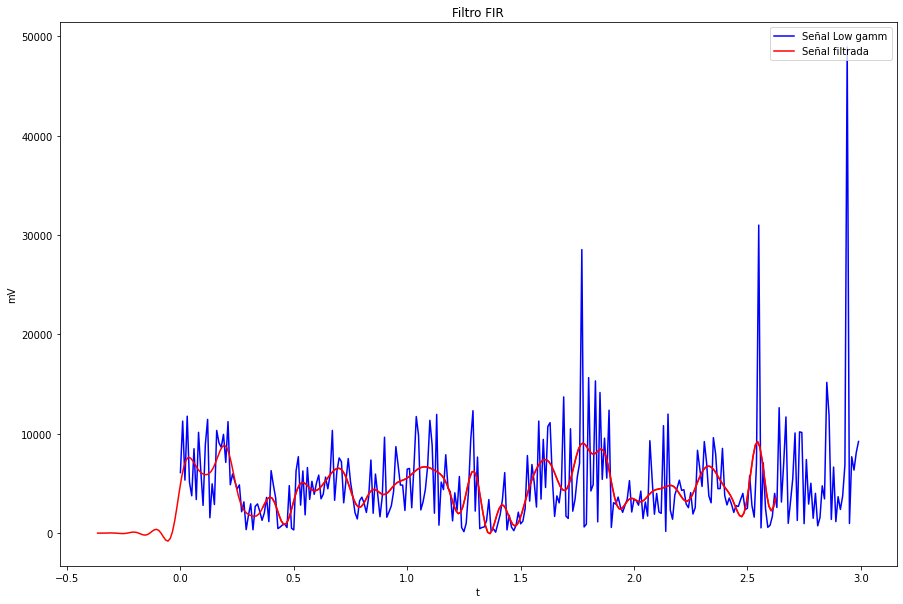

In [251]:
filtered_x = lfilter(taps, 1.0, signal8)
df8['FIR8']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal8[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

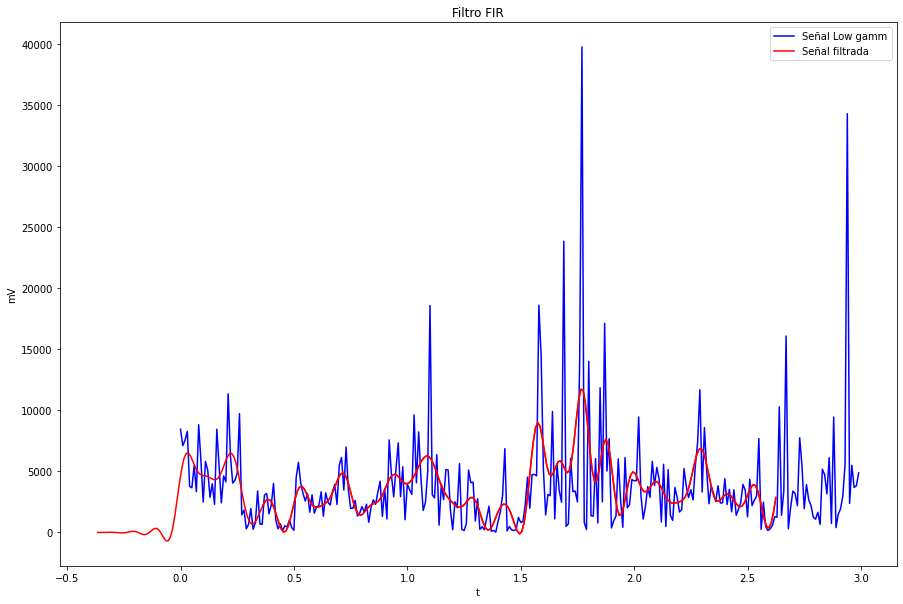

In [253]:
filtered_x = lfilter(taps, 1.0, signal9)
df9['FIR9']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal9[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

## **Impresion de resultados con las señales filtradas con el filtro FIR**

In [257]:
df11=pd.DataFrame()
df11['atencion']=df1['FIR1']
df11['delta']=df2['FIR2']
df11['theta']=df3['FIR3']
df11['low alp ']=df4['FIR4']
df11['high alp']=df5['FIR5']
df11['low bet']=df6['FIR6']
df11['high bet']=df7['FIR7']
df11['low gamm']=df8['FIR8']
df11['min gamm']=df9['FIR9']
df11.to_csv('FIR3.csv')
df11.describe()

,atencion,delta,theta,low alp,high alp,low bet,high bet,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,45.479778,29176.346365,26490.322080,16865.832914,17136.249983,13666.463446,10929.501181,4140.032148,3254.875787
std,24.631161,12811.204900,12273.968257,8215.110298,9239.498962,6974.627487,5538.284014,2451.550088,2308.538847
min,-6.595381,-3171.528309,-2985.637805,-1872.340344,-599.591674,-1701.086960,-1763.154092,-801.820885,-707.802116
25%,28.615041,25696.429130,21357.170157,12981.860276,12293.525841,9938.850127,8146.676426,2473.112168,1807.133948
50%,52.085593,32246.790927,28380.110618,18319.259581,17154.583537,14650.331238,12032.842016,4328.631521,2929.196451
75%,64.109232,37276.180411,35258.181510,22531.001351,22677.993923,18676.335613,14465.869242,6012.671718,4712.662329
max,90.899049,54318.650401,50518.353992,34509.537810,41154.010495,27684.787471,26537.666033,9209.975232,11718.197061
